<a href="https://colab.research.google.com/github/sarthakvashisht/Cat_vs_Dog_CNN/blob/main/catVSdogs83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
User cancelled operation


In [6]:
# Import the required libraries
import zipfile

# Specify the path to the zip file
zip_file_path = "/content/dogs-vs-cats.zip"

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the files in the zip file to the current working directory
    zip_ref.extractall()

In [51]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras import Sequential,regularizers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout, LeakyReLU
from keras.optimizers import SGD
from tensorflow.keras.regularizers import l2


In [60]:
train_data=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=50,
    image_size=(217,217)
)

test_data=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=50,
    image_size=(217,217)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label
train_data=train_data.map(process)
test_data=test_data.map(process)

In [61]:
model=tf.keras.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(217,217,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256,kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dropout(0.5))
model.add(Dense(128,kernel_regularizer=l2(0.01),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(negative_slope=0.01))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:


model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 215, 215, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 215, 215, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 107, 107, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 105, 105, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 105, 105, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 23, 23, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │     7,930,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,361,665 (31.90 MB)

 Trainable params: 8,360,705 (31.89 MB)

 Non-trainable params: 960 (3.75 KB)

In [63]:
opt = SGD(learning_rate=0.01, momentum=0.7)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
history=model.fit(train_data,epochs=20,validation_data=(test_data))

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 54s 107ms/step - accuracy: 0.5307 - loss: 7.7885 - val_accuracy: 0.6490 - val_loss: 5.2039
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.6645 - loss: 4.6457 - val_accuracy: 0.7264 - val_loss: 3.2400
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.7474 - loss: 2.9077 - val_accuracy: 0.7454 - val_loss: 2.1135
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.7990 - loss: 1.8772 - val_accuracy: 0.7914 - val_loss: 1.4095
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.8235 - loss: 1.2712 - val_accuracy: 0.7834 - val_loss: 1.1261
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.8492 - loss: 0.9038 - val_accuracy: 0.8324 - val_loss: 0.7856
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.8702 - loss: 0.6794 - val_accuracy: 0.8324 - val_loss: 0.6882
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.8913 - loss: 0.548

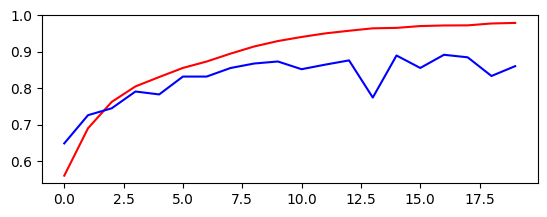

In [69]:
import matplotlib.pyplot as plt
plt.subplot(212)
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.show()

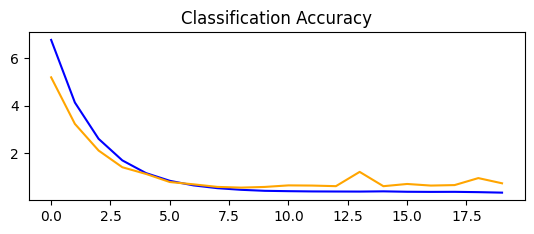

In [70]:
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')